___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 


# TERCER EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Oscar Eduardo Flores Hernández

## Fecha: 4 de mayo del 2021

## Por: Oscar David Jaramillo Z.

# 1
Vamos a suponer que el curso de simulación de procesos financieros es una gran empresa de consultoría financiera que ofrece sus servicios a cualquier tipo de compañía o particular. Supongamos que acuden a nuestra empresa 4 personalidades con los problemas que desean solucionar.

Para cada uno de los clientes, se debe de presentar 3 posibles estrategias de cobertura usando opciones Europeas, Asiáticas y barrera tipo call ó put. Además de ofrecer al cliente este abanico de posibilidades, ustedes como analistas financieros deben de recomendar la mejor estrategia costo-beneficio (basado en sus cálculos), que debería cada empresa tomar, para cumplir con su objetivo. Recuerden, pueden asumir diversos escenarios donde con la valuación realizada para cada una de sus opciones, puedan ustedes dar un estimado monetario en dos posibles escenarios. Por ejemplo, si pueden ejercer la opción entonces el cliente además de vender o comprar sus productos obtendrá una cantidad X de ganancias adicionales o en lugar de perder un 50% de los ingresos en sus ventas, el empresario puede perder sólo el 10% de los ingresos de sus ventas. Por el contrario, en el caso que no ejerza su opción el cliente tendrá una pérdida de la prima de la cantidad de opciones compradas (pero recalcando que el empresario puede estar cubierto ante diversas situaciones). La calificación será basada en el análisis que realicen y propongan a cada cliente usando los resultados de sus valuaciones.

> 1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 

> 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.

> 3. El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.

> 4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

**Para la valuación de opciones europeas debes de comparar tu valuación usando montecarlo con el valor teórico dado por el modelo de Black and Scholes dado en clase y concluir,**

> ###  Criterio de evaluación
> - Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.
> - **Ejercicio 1**: 40% La valuación de cada tipo de opción corresponderá al 40% de todo este examen.
> - **Ejercicio 2**: 60%. El restante 60% corresponderá a la decisión o recomendación basado en sus análisis que le recomendarán a cada compañía.

> ### Entrega
> Se debe de entregar un cuaderno de python donde se reporten todos los cálculos empleados en su análisis. La fecha límite de entrega será el miércoles 12 de mayo a las 5 pm y se expondrá ese mismo día los resultados obtenidos.

> ### Suposiciones 
> - Deben de definirse correctamente el nombre de las acciones a descargar de Yahoo según la empresa asignada.
> - El examen es individual y códigos idénticos serán penalizados.


In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta, date
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close'].dropna()
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

# Calculation of mean and std of log-returns
def calc_daily_ret(closes):
    ret = np.log(closes/closes.shift(1)).dropna()
    return ret.mean(), ret.std()

# Calculation of the price of a call and a put
def opcion_europea(S0, k, r, sigma, expiry, nscen = 10000, plot=False):
    def int_confianza(r, sigma, confidence): 
        return st.norm.interval(confidence, loc=r, scale=sigma)
    
    
    today = pd.Timestamp(date.today())
    dates = pd.date_range(start=today, end=expiry, freq='B')
    ndays = len(dates)

    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
#     sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates) # No funciona!! tasa de crecimiento mu, no r.
#                                                                                r solamente se utiliza para traer flujos a valor presente
    sim_closes = S0*np.exp(sim_ret.cumsum())

    if plot:
        np.fmax(sim_closes,k).plot(legend = False)
        plt.title('Call europea')
        
        np.fmin(sim_closes,k).plot(legend = False)
        plt.title('Put europeo')
    
    else:
        call=pd.DataFrame({'Call':np.exp(-r*ndays)*np.fmax(sim_closes - k, 0).mean(axis=1)}, index=dates)
        ax = call.plot();

        put=pd.DataFrame({'Put':np.exp(-r*ndays)*np.fmax(k - sim_closes, 0).mean(axis=1)}, index=dates)
        put.plot(ax = ax);

        conf = 0.95
        print('Call: {}'.format(call.iloc[-1].Call))
        print('Confidence interval (95%): {}{}'.format(int_confianza(call.iloc[-1], sim_closes.iloc[-1].sem(), conf)[0],
             int_confianza(call.iloc[-1], sim_closes.iloc[-1].sem(), conf)[1]))
        print('Put: {}'.format(put.iloc[-1].Put))
        print('Confidence interval (95%): {}{}'.format(int_confianza(put.iloc[-1], sim_closes.iloc[-1].sem(), conf)[0],
             int_confianza(put.iloc[-1], sim_closes.iloc[-1].sem(), conf)[1]))    

# Analytical calculation of the price of a call and a put through Black-Scholes. 
def Black_Scholes(S0, k, r, sigma, expiry):
    norm = lambda x:st.norm(0, 1 ).cdf(x)
    
    today = pd.Timestamp(date.today())
    dates = pd.date_range(start=today, end=expiry, freq='B')
    ndays = len(dates)
    
    def d1(t):
        return (np.log(S0/k) + (r + (sigma**2)/2)*t)/(sigma*t**0.5)
    
    def d2(t):
        return (np.log(S0/k) + (r - (sigma**2)/2)*t)/(sigma*t**0.5)
    
    def put(S0, k, r, sigma, t):
        return k*np.exp(-r * t) * norm(-d2(t)) - S0*norm(-d1(t))
    
    def call(S0, k, r, sigma, t):
        return S0*norm(d1(t)) - k*np.exp(-r * t) * norm(d2(t))

    Call = pd.DataFrame({'Call':[call(S0, k, r, sigma, t) for t in np.arange(ndays)+1]},index=dates)
    Put = pd.DataFrame({'Put':[put(S0, k, r, sigma, t) for t in np.arange(ndays)+1]},index=dates)   
    
    ax = Call.plot()
    Put.plot(ax = ax)
    
    return Call.iloc[-1], Put.iloc[-1]


# Definir barrera
def opciones_barrera(S, k, r, sigma, expiry, bu = 0, bd = 0, n_sim = 10000):
    
    today = pd.Timestamp(date.today())
    dates = pd.date_range(start = today, end = expiry, freq='B')

    ndays = len(dates)

    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,n_sim)+r,index=dates)
    sim_closes = S*np.exp(sim_ret.cumsum())
    
    # Calcular la prima de una opción Europea
    call = pd.DataFrame({'Call':np.exp(-r*ndays)*np.fmax(sim_closes - k, 0)
                         .mean(axis=1)},index=dates)
    put = pd.DataFrame({'Put':np.exp(-r*ndays)*np.fmax(k - sim_closes, 0)
                     .mean(axis=1)},index=dates)

    # CALL OPTIONS
    ax = call.plot();
    
    I = (sim_closes > bu).cumsum(axis=0) > 0
    callui = pd.DataFrame({'Call up-and-in':np.exp(-r*ndays)*(I * np.fmax(sim_closes - k, 0))
                           .mean(axis=1)},index=dates)
    callui.plot(ax=ax);

    I = (sim_closes > bu).cumsum(axis=0) == 0
    calluo = pd.DataFrame({'Call up-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - k, 0))
                       .mean(axis=1)},index=dates)
    calluo.plot(ax=ax);

    I = (sim_closes < bd).cumsum(axis=0) > 0
    calldi = pd.DataFrame({'Call down-and-in':np.exp(-r*ndays)*(I * np.fmax(sim_closes - k, 0))
                       .mean(axis=1)},index=dates)    
    calldi.plot(ax=ax);
    
    I = (sim_closes < bd).cumsum(axis=0) == 0
    calldo = pd.DataFrame({'Call down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - k, 0))
                       .mean(axis=1)},index=dates)
    calldo.plot(ax=ax);
    
    
    # PUT OPTIONS 
    ax = put.plot();

    I = (sim_closes > bu).cumsum(axis=0) > 0
    putui = pd.DataFrame({'Put up-and-in':np.exp(-r*ndays)*(I * np.fmax(k - sim_closes, 0))
                           .mean(axis=1)},index=dates)
    putui.plot(ax=ax);

    I = (sim_closes > bu).cumsum(axis=0) == 0
    putuo = pd.DataFrame({'Put up-and-out':np.exp(-r*ndays)*(I * np.fmax(k - sim_closes, 0))
                       .mean(axis=1)},index=dates)
    putuo.plot(ax=ax);
    
    I = (sim_closes < bd).cumsum(axis=0) > 0
    putdi = pd.DataFrame({'Put down-and-in':np.exp(-r*ndays)*(I * np.fmax(k - sim_closes, 0))
                       .mean(axis=1)},index=dates)    
    putdi.plot(ax=ax);
    
    I = (sim_closes < bd).cumsum(axis=0) == 0
    putdo = pd.DataFrame({'Put down-and-out':np.exp(-r*ndays)*(I * np.fmax(k - sim_closes, 0))
                       .mean(axis=1)},index=dates)
    putdo.plot(ax=ax);
    
def opcion_asiatica(S, k, r, sigma, expiry, n_sim = 10000, plot=False):
    
    today = pd.Timestamp(date.today())
    dates = pd.date_range(start = today, end = expiry, freq='B')

    ndays = len(dates)

    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,n_sim)+r,index=dates)
    sim_closes = S*np.exp(sim_ret.cumsum())

    for_avg = 1/(np.arange(sim_closes.shape[0])+1) #Necesario para calcular el promedio aritmetico a la suma acumulada
    cum_sum = sim_closes.cumsum() #La suma acumulada
    
    asiatica = np.multiply(for_avg,cum_sum.T).T
    

    
    ##### Calculando opción asiática con promedio aritmetico ##### (recordar que también existe la opción asiatica de promedio geometrico)
    calla = pd.DataFrame({'Call asiatico':np.exp(-r*ndays)*np.fmax(asiatica - k, 0)
                         .mean(axis=1)},index=dates)
    puta = pd.DataFrame({'Put asiatico':np.exp(-r*ndays)*np.fmax(k - asiatica, 0)
                     .mean(axis=1)},index=dates)
    
    # Calcular la prima de una opción Europea
    call = pd.DataFrame({'Call':np.exp(-r*ndays)*np.fmax(sim_closes - k, 0)
                         .mean(axis=1)},index=dates)
    put = pd.DataFrame({'Put':np.exp(-r*ndays)*np.fmax(k - sim_closes, 0)
                     .mean(axis=1)},index=dates)    
    
    if plot:
        asiatica.plot(legend=False)
    
    else:
        ax = call.plot()
        calla.plot(ax = ax)

        put.plot(ax = ax)
        puta.plot(ax = ax)
    
def expected_value(S, k, r, sigma, expiry, n_sim = 10000):
    bins = 25
    
    today = pd.Timestamp(date.today())
    dates = pd.date_range(start = today, end = expiry, freq='B')

    ndays = len(dates)

    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,n_sim)+r,index=dates)
    sim_closes = pd.DataFrame(S*np.exp(sim_ret.cumsum()))

    F = sim_closes.mean(axis=1) # Contratando un Futuro a precio 'justo'. 
    return_F = (sim_closes.T-F).T
    F.plot()
    print('Valor futuro esperado: {}'.format(F[-1]))

## Ejercicios: 

> 1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 

Como uno de los supuestos asumiremos que la empresa mantiene sus costos constantes y gana dinero de la producción de Maiz. Por lo tanto, le es conveniente vender a un precio mayor.

El precio base al cuál podrían vender el Maíz esta dado por la tasa de crecimiento al día de hoy, hasta llegar a la fecha indicada. 

Un precio menor al esperado por el mercado será pérdida para ellos (no perdida literal, puesto que ellos tienen su estructura de costos bien definida, pero dejarían de ganar el valor de mercado). Mientras que un precio superior sería ganancia. 

Se tomará una posición corta para compensar las pérdidas en el mercado con las obtenidas por su producción. 

In [2]:
asset = 'ZC=F'

In [3]:
closes = get_adj_closes([asset], '2019-01-01')
closes_adj = closes.loc[:,asset]

In [4]:
mu, sigma = calc_daily_ret(closes_adj)
expiry = '2021-12-01'
k = 730
S = closes_adj.iloc[-1]
r = 0.004/360

mu, sigma, r

(0.001091836390903792, 0.015721639683082246, 1.1111111111111112e-05)

S0 = 713.25
Valor futuro esperado: 728.3989801734064


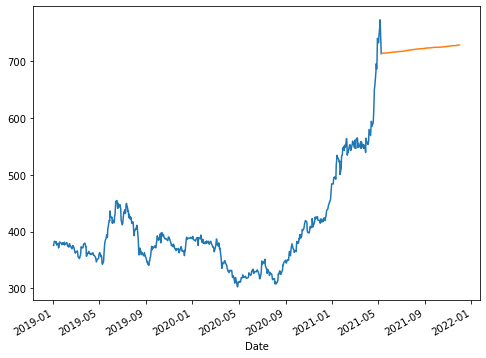

In [5]:
closes_adj.plot(figsize=(8,6));
print('S0 = {}'.format(closes_adj[-1]))
expected_value(S, k, r, sigma, expiry)

Este sería el ejemplo de los precios que se obtendrían según el escenario. para una posición larga se utilizaría un call, mientras que para una posición corta se utilizaría un put. En este caso se proyecta que el precio del maiz llegue hasta los 1200, pero se limita a los 780 en caso de que se ejerza la opción. Del mismo modo aplica la cobertura para posiciones cortas pero con uso de una opción de venta (put).


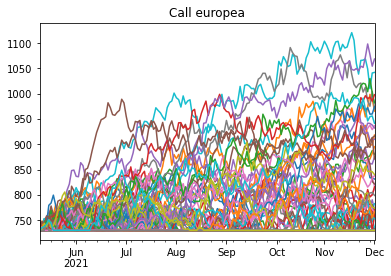

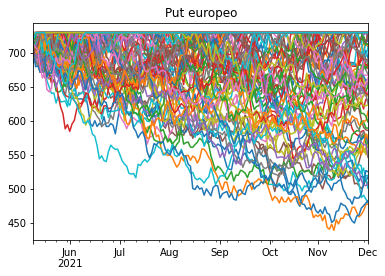

In [6]:
opcion_europea(S, k, r, sigma, expiry, nscen=100, plot=True)

Call: 54.878711250279174
Confidence interval (95%): [52.1236929][57.6337296]
Put: 55.92245785171959
Confidence interval (95%): [53.1674395][58.6774762]


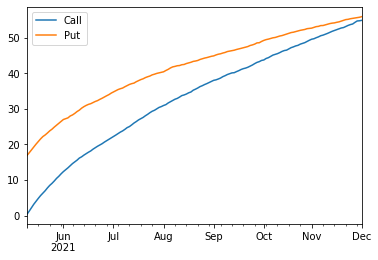

In [7]:
opcion_europea(S, k, r, sigma, expiry)

A continuación se muestra el mismo calculo que el mostrado anteriormente, pero esa vez utilizando Black-Scholes

(Call    47.505
 Name: 2021-12-01 00:00:00, dtype: float64,
 Put    63.055
 Name: 2021-12-01 00:00:00, dtype: float64)

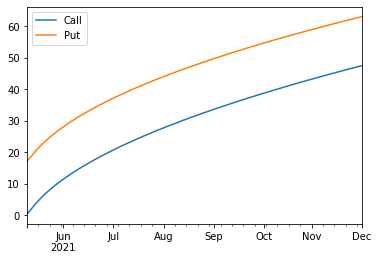

In [8]:
Black_Scholes(S, k, r, sigma, expiry)

Diversas estrategias se pueden crear utilizando barreras. A continuación se muestran todas las posibles combinaciones de opciones que se pueden comprar. Cabe destacar que aún más complejo se vuelve el asunto cuando se combina la venta de opciones junto con la compra de opciones (en veces en una misma dirección; compra put, venta call, pero a diferentes strike price). La venta de opciones normalmente se utilizará como financiamiento de la compra de la otra opción. Este último escenario no será simulado en este paper. 

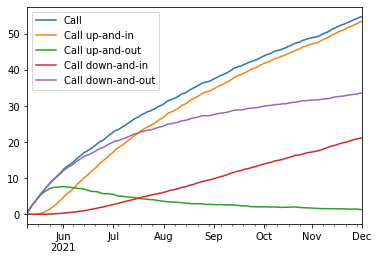

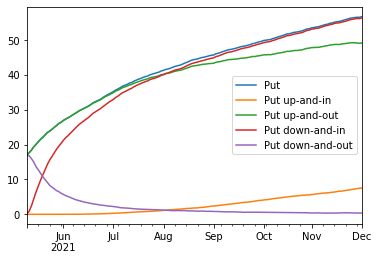

In [9]:
bu = 800
bd = 680

opciones_barrera(S, k, r, sigma, expiry, bu=bu, bd=bd)

El funcionamiento de una opción asiática considera el promedio (ya sea geometrico o aritmético) de un activo a lo largo del periodo señalado. 

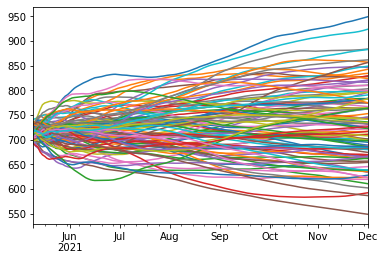

In [10]:
opcion_asiatica(S, k, r, sigma, expiry, n_sim = 100,plot=True)

Como se puede observar, el precio de las opciones asiáticas en el caso de las opciones de compra es menor al precio de las opciones europeas. No obstante, la probabilidad de que se ejerzan es también menor. 

Sin embargo, en el caso de los put, el asiatico tiene menor probabilidad de superar el precio de ejercicio establecido, por lo tanto es más probable que se ejerza, eso lo convierte en una opción más costosa. 

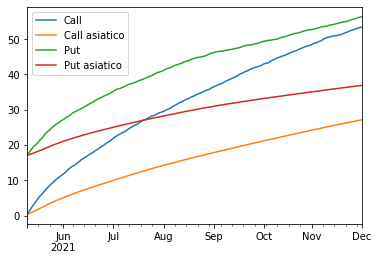

In [11]:
opcion_asiatica(S, k, r, sigma, expiry)

Valor futuro esperado: 727.3546144029832


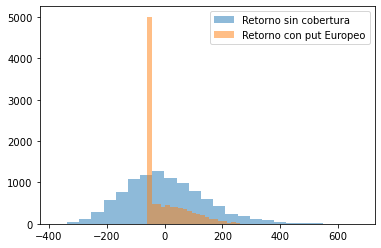

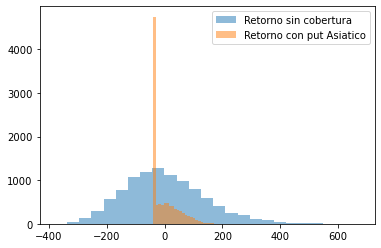

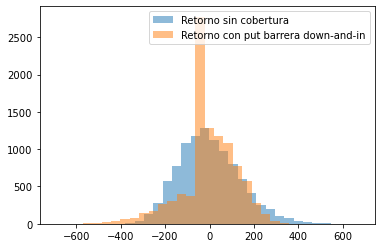

In [12]:
bins = 25
n_sim = 10000

today = pd.Timestamp(date.today())
dates = pd.date_range(start = today, end = expiry, freq='B')

ndays = len(dates)

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,n_sim)+r,index=dates)
sim_closes = pd.DataFrame(S*np.exp(sim_ret.cumsum()))

############# Posición Corta #############
# Las comparaciones de ingreso se harán en base al valor del precio futuro.
F = sim_closes.mean(axis=1) # Contratando un Futuro a precio 'justo'. 
return_F = (sim_closes.T-F).T
# ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5) # Graficar
print('Valor futuro esperado: {}'.format(F[-1]))

# cobertura con put europea
put_price=pd.DataFrame({'Put':np.exp(-r*ndays)*np.fmax(k - sim_closes, 0).mean(axis=1)}, index=dates)
return_put = (F - np.fmin(sim_closes,k).T - np.exp(r*ndays)*put_price['Put']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_put.iloc[-1], label='Retorno con put Europeo', bins=bins, alpha=0.5);
plt.legend()
plt.show()

# cobertura con put asiatica
for_avg = 1/(np.arange(sim_closes.shape[0])+1) #Necesario para calcular el promedio aritmetico a la suma acumulada
cum_sum = sim_closes.cumsum() #La suma acumulada

asiatica = np.multiply(for_avg,cum_sum.T).T

puta_price = pd.DataFrame({'Put asiatico':np.exp(-r*ndays)*np.fmax(k - asiatica, 0)
                 .mean(axis=1)},index=dates)
return_puta = (F - np.fmin(asiatica,k).T - np.exp(r*ndays)*puta_price['Put asiatico']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_puta.iloc[-1], label='Retorno con put Asiatico', bins=bins, alpha=0.5);
plt.legend()
plt.show()

# Cobertura con barrera down and in
I = (sim_closes < bd).cumsum(axis=0) > 0
putdi_price = pd.DataFrame({'Put down-and-in':np.exp(-r*ndays)*(I * np.fmax(sim_closes - k, 0))
                   .mean(axis=1)},index=dates)  
return_putdi_p = (F - np.fmin(sim_closes,k)[I].T - np.exp(r*ndays)*putdi_price['Put down-and-in']).T.fillna(0)
return_putdi_n = (F - sim_closes[~I].T - putdi_price['Put down-and-in']).T.fillna(0)
return_putdi = return_putdi_n + return_putdi_p

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5)
plt.hist(return_putdi.iloc[-1], label='Retorno con put barrera down-and-in', bins = 25, alpha=0.5)
plt.legend()
plt.show()

Por último se simulan las ganancias que se obtendrían (en comparación con el precio del futuro). No se puede hacer una 'recomendación' debido a que todas las opciones son justas y en ninguna existe arbitraje. El primero de los escenarios (call europeo) es quizá el más común, sin embargo es también el más costoso (sin tomar en cuenta opciones Americanas). La opción asiática resulta ser bastante buena a pesar de que limita demasiado las ganancias. Aún así da un poco de libertad de ganar más a costa de una prima no tan costosa. 
Finalmente, la opción barrera down and in da muy buenas oportunidades de crecimiento, sin embargo tiene su contra de que si no se activa la opción se puede llegar a perder dinero aunque no en la misma magnitud como con la ausencia de cobertura. 

Cabe señalar que los tres casos anteriores son posiciones cortas. Esto implica que un número de rendimientos negativos significa que el precio subió más que el valor futuro. De la misma forma, una posición en los números positivos significa que el precio era inferior al valor de un futuro y por lo tanto se obtienen ganancias. 


- Nota: todas las gráficas que se muestren a continuación con el mismo esquema que este último ya consideran el costo de la prima, el valor esperado y los valores simulados. 

> 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.

Maximizar las ganancias no es un tema que se pueda tratar con opciones, futuros, derivados ni otros instrumentos financieros a menos de que se incurra en especulación, solo así es probable que se generen ganancias pero a costa de un riesgo mayor. 

Para este ejercicio asumiremos que lo que se desea es minimizar el riesgo de perdida, aunque eso también implica reducir ganancias.

Mismos supuestos que los presentados anteriormente, se compara el valor Futuro esperado con las combinaciones de mercado que se puedan generar y decidimos en base a nuestras preferencias. No existe una solución 'optima' puesto que no existe el arbitaje. Por lo tanto, cualquier opción que se tome será justa tanto para el vendedor como para el comprador. 

In [13]:
asset = 'ALI=F'

In [14]:
closes = get_adj_closes([asset], '2019-09-01')
closes_adj = closes.loc[:,asset]

In [15]:
mu, sigma = calc_daily_ret(closes_adj)
expiry = '2022-05-13'
k = 2600
S = closes_adj.iloc[-1]
r = 0.006/360

mu, sigma, r

(0.0009010376562256342, 0.010150888502644236, 1.6666666666666667e-05)

Una vez que se tienen los datos simularemos distintos escenarios y se harán propuestas de opciones financieras.

Notese que debido a que no se especifica en las indicaciones tomamos por hecho que se espera hacer una cobertura hasta el siguiente año, por lo tanto se toma una tasa de interés libre de riesgo a un año

S0 = 2555.25
Valor futuro esperado: 2604.3866563263377


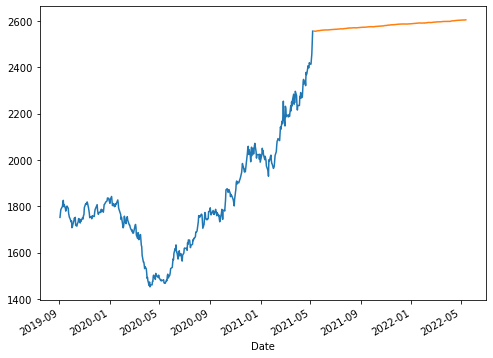

In [16]:
closes_adj.plot(figsize=(8,6));
print('S0 = {}'.format(closes_adj[-1]))
expected_value(S, k, r, sigma, expiry)

Call: 168.9588687424312
Confidence interval (95%): [160.52730622][177.39043127]
Put: 166.44774714379318
Confidence interval (95%): [158.01618462][174.87930967]


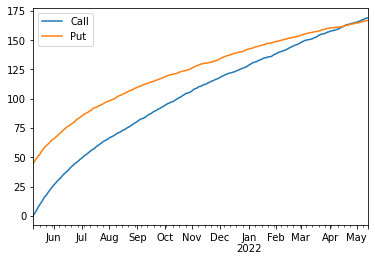

In [17]:
opcion_europea(S, k, r, sigma, expiry)

(Call    153.227
 Name: 2022-05-13 00:00:00, dtype: float64,
 Put    186.519
 Name: 2022-05-13 00:00:00, dtype: float64)

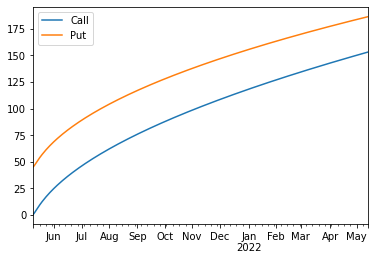

In [18]:
Black_Scholes(S, k, r, sigma, expiry)

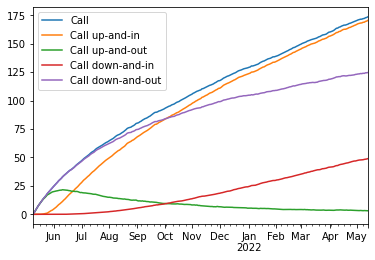

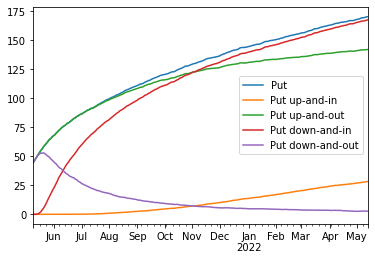

In [19]:
bu = 2800
bd = 2400

opciones_barrera(S, k, r, sigma, expiry, bu=bu, bd=bd)

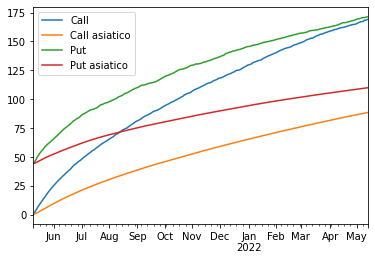

In [20]:
opcion_asiatica(S, k, r, sigma, expiry)

Valor futuro esperado: 2597.963316676825


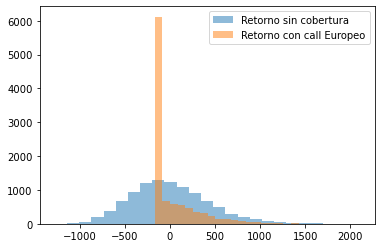

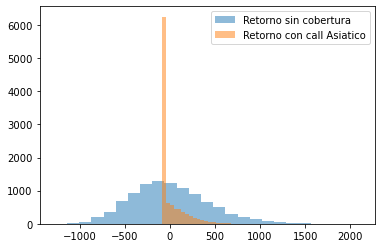

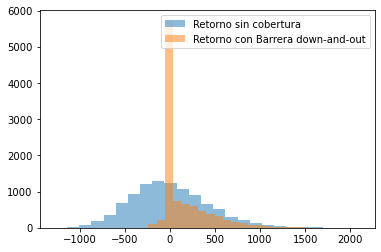

In [21]:
bins = 25
n_sim = 10000

today = pd.Timestamp(date.today())
dates = pd.date_range(start = today, end = expiry, freq='B')

ndays = len(dates)

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,n_sim)+r,index=dates)
sim_closes = pd.DataFrame(S*np.exp(sim_ret.cumsum()))

############# Posición Larga #############
# Las comparaciones de ingreso se harán en base al valor del precio futuro.
F = sim_closes.mean(axis=1) # Contratando un Futuro a precio 'justo'. 
return_F = (sim_closes.T-F).T
# ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5) # Graficar
print('Valor futuro esperado: {}'.format(F[-1]))

# cobertura con call europea
call_price = pd.DataFrame({'Call':np.exp(-r*ndays)*np.fmax(sim_closes - k, 0)
                 .mean(axis=1)},index=dates)
return_call = (np.fmax(sim_closes,k).T - F - np.exp(r*ndays)*call_price['Call']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_call.iloc[-1], label='Retorno con call Europeo', bins=bins, alpha=0.5);
plt.legend()
plt.show()

# cobertura con call asiatica
for_avg = 1/(np.arange(sim_closes.shape[0])+1) #Necesario para calcular el promedio aritmetico a la suma acumulada
cum_sum = sim_closes.cumsum() #La suma acumulada

asiatica = np.multiply(for_avg,cum_sum.T).T

calla_price = pd.DataFrame({'Call asiatico':np.exp(-r*ndays)*np.fmax(asiatica - k, 0)
                 .mean(axis=1)},index=dates)
return_calla = (np.fmax(asiatica,k).T - F - np.exp(r*ndays)*calla_price['Call asiatico']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_calla.iloc[-1], label='Retorno con call Asiatico', bins=bins, alpha=0.5);
plt.legend()
plt.show()

# Cobertura con barrera down and out
I = (sim_closes < bd).cumsum(axis=0) > 0
calldo_price = pd.DataFrame({'Call down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - k, 0))
                   .mean(axis=1)},index=dates)  
return_calldo_p = (np.fmax(sim_closes,k)[I].T - F - calldo_price['Call down-and-out']).T.fillna(0)
return_calldo_n = (sim_closes[~I].T - F - calldo_price['Call down-and-out']).T.fillna(0)
return_calldo = return_calldo_n + return_calldo_p

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5)
plt.hist(return_calldo.iloc[-1], label='Retorno con Barrera down-and-out', bins = 25, alpha=0.5)
plt.legend()
plt.show()


Un caso bastante peculiar es el de la opción Asiatica que pierde dinero muy sistemáticamente, sin embargo reduce el riesgo en los negativos al punto de considerarse prácticamente un 'Futuro' pero que solamente en algunos escenarios (cuando el precio de los activos sube demasiado) genera rendimientos mucho mayores a los de un futuro.

> 3. El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.


Mismos supuestos que en el ejercicio anterior. 

Posición corta. Se busca comprar opciones de venta. (En su alternativa podrían venderse opciones de compra y cubrirse de ellas) 

In [22]:
asset = 'GC=F'

In [23]:
closes = get_adj_closes([asset], '2019-01-01')
closes_adj = closes.loc[:,asset]

In [24]:
mu, sigma = calc_daily_ret(closes_adj)
expiry = '2022-05-13'
k = 1900
S = closes_adj.iloc[-1]
r = 0.006/360

mu, sigma, r

(0.0006136636513849847, 0.010861642458513742, 1.6666666666666667e-05)

Mismo caso que en el ejercicio anterior, esta vez se pretende hacer la cobertura a un año (bastante volatilidad en un año...) 

S0 = 1836.5
Valor futuro esperado: 1879.9692596918057


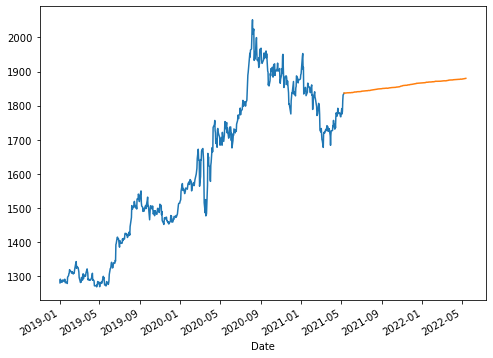

In [25]:
closes_adj.plot(figsize=(8,6));
print('S0 = {}'.format(closes_adj[-1]))
expected_value(S, k, r, sigma, expiry)

Call: 123.0572377965322
Confidence interval (95%): [116.5024647][129.6120109]
Put: 142.52723783043152
Confidence interval (95%): [135.97246473][149.08201093]


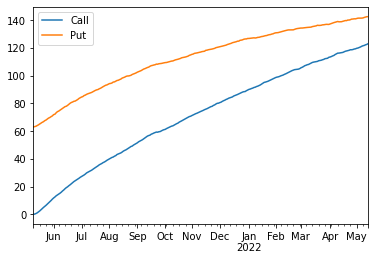

In [26]:
opcion_europea(S, k, r, sigma, expiry)

(Call    105.582
 Name: 2022-05-13 00:00:00, dtype: float64,
 Put    160.709
 Name: 2022-05-13 00:00:00, dtype: float64)

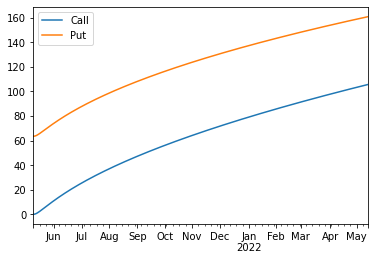

In [27]:
Black_Scholes(S, k, r, sigma, expiry)

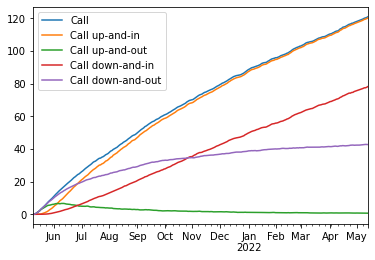

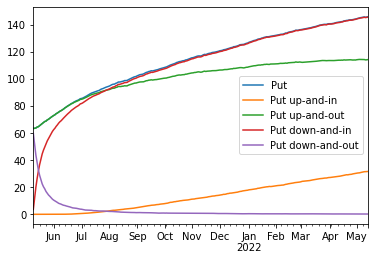

In [28]:
bu = 2000
bd = 1800

opciones_barrera(S, k, r, sigma, expiry, bu=bu, bd=bd)

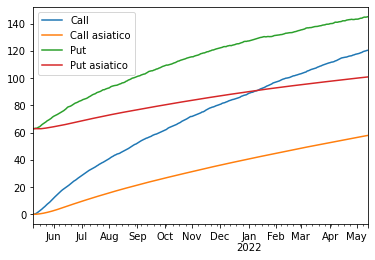

In [29]:
opcion_asiatica(S, k, r, sigma, expiry)

Valor futuro esperado: 1874.6827981664262


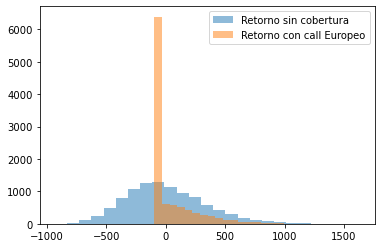

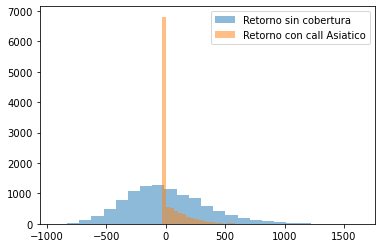

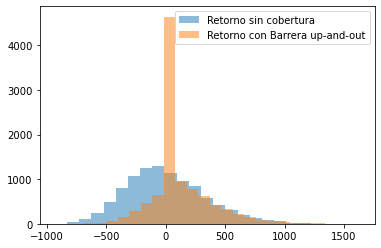

In [30]:
bins = 25
n_sim = 10000

today = pd.Timestamp(date.today())
dates = pd.date_range(start = today, end = expiry, freq='B')

ndays = len(dates)

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,n_sim)+r,index=dates)
sim_closes = pd.DataFrame(S*np.exp(sim_ret.cumsum()))

############# Posición Larga #############
# Las comparaciones de ingreso se harán en base al valor del precio futuro.
F = sim_closes.mean(axis=1) # Contratando un Futuro a precio 'justo'. 
return_F = (sim_closes.T-F).T
# ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5) # Graficar
print('Valor futuro esperado: {}'.format(F[-1]))

# cobertura con call europea
call_price = pd.DataFrame({'Call':np.exp(-r*ndays)*np.fmax(sim_closes - k, 0)
                 .mean(axis=1)},index=dates)
return_call = (np.fmax(sim_closes,k).T - F - np.exp(r*ndays)*call_price['Call']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_call.iloc[-1], label='Retorno con call Europeo', bins=bins, alpha=0.5);
plt.legend()
plt.show()

# cobertura con call asiatica
for_avg = 1/(np.arange(sim_closes.shape[0])+1) #Necesario para calcular el promedio aritmetico a la suma acumulada
cum_sum = sim_closes.cumsum() #La suma acumulada

asiatica = np.multiply(for_avg,cum_sum.T).T

calla_price = pd.DataFrame({'Call asiatico':np.exp(-r*ndays)*np.fmax(asiatica - k, 0)
                 .mean(axis=1)},index=dates)
return_calla = (np.fmax(asiatica,k).T - F - np.exp(r*ndays)*calla_price['Call asiatico']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_calla.iloc[-1], label='Retorno con call Asiatico', bins=bins, alpha=0.5);
plt.legend()
plt.show()

# Cobertura con barrera up and out
I = (sim_closes > bu).cumsum(axis=0) == 0
calluo_price = pd.DataFrame({'Call up-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - k, 0))
                   .mean(axis=1)},index=dates)
return_calluo_p = (np.fmax(sim_closes,k)[I].T - F - calluo_price['Call up-and-out']).T.fillna(0)
return_calluo_n = (sim_closes[~I].T - F - calluo_price['Call up-and-out']).T.fillna(0)
return_calluo = return_calluo_n + return_calluo_p

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5)
plt.hist(return_calluo.iloc[-1], label='Retorno con Barrera up-and-out', bins = 25, alpha=0.5)
plt.legend()
plt.show()

Como se puede observar, en este caso la prima es bastante cara en la mayoría de los escenarios, sin embargo se logran minimizar perdidas bastante fuertes a costa de mantener ganancias futuras prometedoras. No hay que negar que el costo de tener la opción de ganar 'mucho' es alto.

> 4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

Mismos supuestos que en los ejercicios anteriores. Se utilizarán datos del crudo Brent.

Se busca una posición larga en las coberturas que hagamos, por lo tanto compraremos opciones de venta o 'call'. 


In [31]:
asset = 'BZ=F'

In [32]:
closes = get_adj_closes([asset], '2019-01-01')
closes_adj = closes.loc[:,asset]

In [33]:
mu, sigma = calc_daily_ret(closes_adj)
expiry = '2022-05-13'
k = 81
S = closes_adj.iloc[-1]
r = 0.006/360

mu, sigma, r

(0.0003729022324432323, 0.03431142702844131, 1.6666666666666667e-05)

S0 = 68.2699966430664
Valor futuro esperado: 80.46324109392248


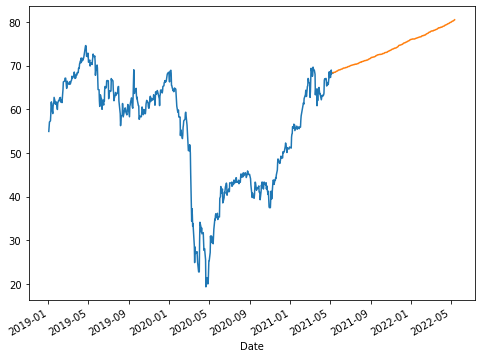

In [34]:
closes_adj.plot(figsize=(8,6));
print('S0 = {}'.format(closes_adj[-1]))
expected_value(S, k, r, sigma, expiry)

Call: 14.336108374015136
Confidence interval (95%): [13.35919042][15.31302633]
Put: 23.93908034022835
Confidence interval (95%): [22.96216239][24.91599829]


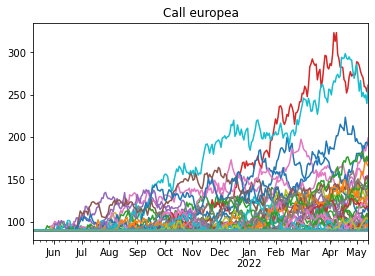

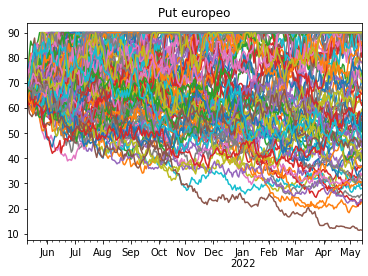

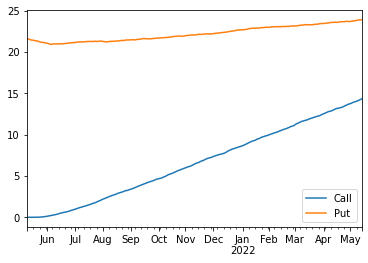

In [35]:
opcion_europea(S, k, r, sigma, expiry, nscen= 100, plot=True)
opcion_europea(S, k, r, sigma, expiry)

(Call    8.648
 Name: 2022-05-13 00:00:00, dtype: float64,
 Put    29.981
 Name: 2022-05-13 00:00:00, dtype: float64)

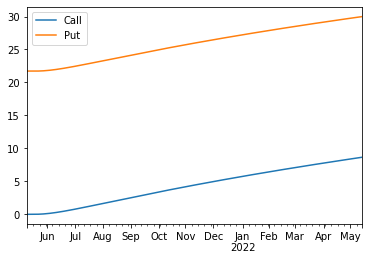

In [36]:
Black_Scholes(S, k, r, sigma, expiry)

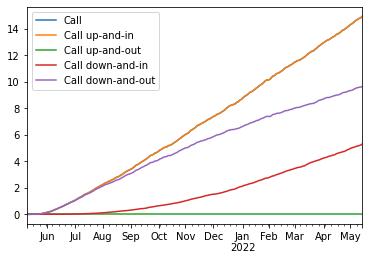

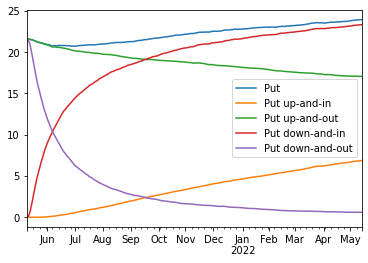

In [40]:
bu = 90
bd = 60

opciones_barrera(S, k, r, sigma, expiry, bu=bu, bd=bd)

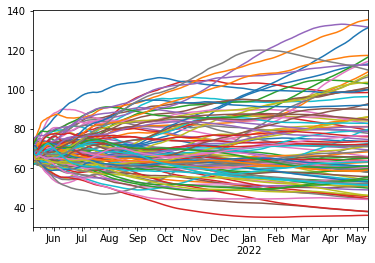

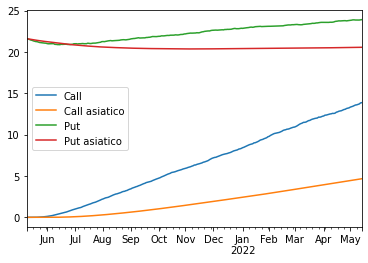

In [41]:
opcion_asiatica(S, k, r, sigma, expiry, n_sim=100, plot=True)
opcion_asiatica(S, k, r, sigma, expiry)

Valor futuro esperado: 80.46181952232132


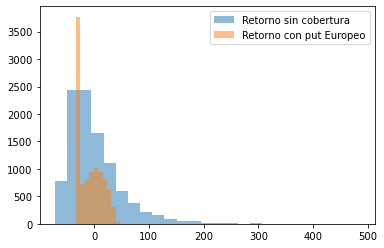

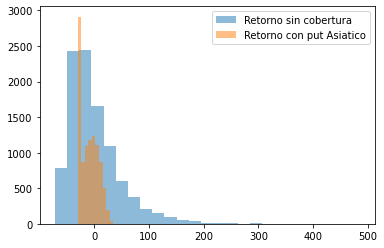

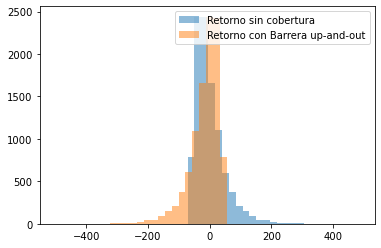

In [42]:
bins = 25
n_sim = 10000

today = pd.Timestamp(date.today())
dates = pd.date_range(start = today, end = expiry, freq='B')

ndays = len(dates)

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,n_sim)+r,index=dates)
sim_closes = pd.DataFrame(S*np.exp(sim_ret.cumsum()))

############# Posición Corta #############
# Las comparaciones de ingreso se harán en base al valor del precio futuro.
F = sim_closes.mean(axis=1) # Contratando un Futuro a precio 'justo'. 
return_F = (sim_closes.T-F).T
# ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5) # Graficar
print('Valor futuro esperado: {}'.format(F[-1]))

# cobertura con put europea
put_price=pd.DataFrame({'Put':np.exp(-r*ndays)*np.fmax(k - sim_closes, 0).mean(axis=1)}, index=dates)
return_put = (F - np.fmin(sim_closes,k).T - np.exp(r*ndays)*put_price['Put']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_put.iloc[-1], label='Retorno con put Europeo', alpha=0.5);
plt.legend()
plt.show()

# cobertura con put asiatica
for_avg = 1/(np.arange(sim_closes.shape[0])+1) #Necesario para calcular el promedio aritmetico a la suma acumulada
cum_sum = sim_closes.cumsum() #La suma acumulada

asiatica = np.multiply(for_avg,cum_sum.T).T

puta_price = pd.DataFrame({'Put asiatico':np.exp(-r*ndays)*np.fmax(k - asiatica, 0)
                 .mean(axis=1)},index=dates)
return_puta = (F - np.fmin(asiatica,k).T - np.exp(r*ndays)*puta_price['Put asiatico']).T

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5);
plt.hist(return_puta.iloc[-1], label='Retorno con put Asiatico', alpha=0.5);
plt.legend()
plt.show()

# Cobertura con put barrera up and out
I = (sim_closes > bu).cumsum(axis=0) == 0
putuo_price = pd.DataFrame({'Put up-and-out':np.exp(-r*ndays)*(I * np.fmax(k - sim_closes, 0))
                   .mean(axis=1)},index=dates)
return_putuo_p = (F - np.fmin(sim_closes,k)[I].T - np.exp(-r*ndays)*putuo_price['Put up-and-out']).T.fillna(0)
return_putuo_n = (F - sim_closes[~I].T - putuo_price['Put up-and-out']).T.fillna(0)
return_putuo = return_putuo_n + return_putuo_p

ax = plt.hist(return_F.iloc[-1], label='Retorno sin cobertura', bins=bins, alpha=0.5)
plt.hist(return_putuo.iloc[-1], label='Retorno con Barrera up-and-out', bins = 25, alpha=0.5)
plt.legend()
plt.show()
    

En esta ocasión nos encontramos con un activo bastante diferente a los presentados en los 3 casos anteriores. Los 3 activos anteriores tenían en común que tenían una tendencia de crecimiento muy notoria. Mientras que el crudo de Brent parece tener oscilaciones laterales y un crecimiento a penas notorio.

En las primeras dos propuestas encontramos que un put Asiatico y un put Europeo limitan demasiado las ganancias, pero también limitan las pérdidas. Es importante notar también que a diferencia de los activos anteriores, en este se tienen  Volatilidades tan altas que la simulación encuentra que se puede llegar casi a 0. es por eso que no tiene una distribución normal, sino una parecida a la beta o gamma. 

Para el último escenario, parece que simplemente se 'espejearon' los datos, y es así, puesto que estamos tomando una posición en corto y lo único que logramos es tener mayor probabilidad de ganar dinero, a costa de perder una cantidad ilimitada en escenarios alcistas al precio.

Para esta empresa en particular, creo que lo mejor es firmar un Futuro, un put europeo o un put asiatico. 


### Conclusiones: 

En veces los derivados financieros ofrecen muy buenas coberturas, sin embargo, el uso incorrecto de ellas puede llevar a catástrofes, especialmente cuando se tienen posiciones cortas de las mismas (nosotros hemos estado largos en todas las opciones; compramos put o compramos call, pero nunca vendemos ninguna de ellas, que también es posible.) Al tomar posiciones cortas de las opciones se tiene la ventaja de recibir una prima, sin embargo, a cambio de ello habrá que hacer una cobertura por separado para evitar perdidas posteriormente. 

Una forma 'real' de evitar una catastrofe en el caso de una opción corta sería no esperar a que finalice el plazo, sino que en cuanto parezca que se romperá la barrera se incurra a un cambio de estrategia. Una posible estrategia podría ser comprar los activos en su totalidad (aunque quizá no la  más recomendable según la situación). 

Casos como el del petróleo son bastante complicados de manejar y no se pueden proyectar a plazos tan largos como en nuestro ejercicio. Intentar hacer una cobertura a un año en activos tan volátiles probablemente resulte en pagar primas bastante altas. 



<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>